**简介**    
在机器学习领域中，分类是指利用数据的特性将其分成若干类型的过程。    
分类与回归不同，回归的输出结果是实数，监督学习分类器就是用带标记的训练数据建立一个模型，然后对未知数据进行分类。     
分类器是可以实现分类功能的任意算法，最简单的分类器就是简单的数学函数。    
在现实生活中，分类器可以是非常复杂的形式。   

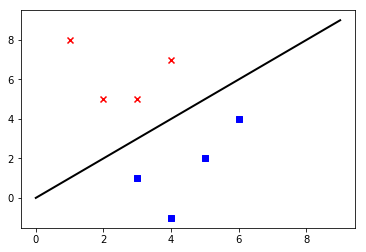

In [11]:
# 建立简单分类器
import numpy as np
import matplotlib.pyplot as plt
# 样本数据
x = np.array([[3,1], [2,5], [1,8], [6,4], [5,2], [3,5], [4,7], [4,-1]])

# 为这些数据点分配一些标记
y = [0, 1, 1, 0, 0, 1, 1, 0]

# 按照类型标记把样本数据分成两类
class0 = np.array([x[i] for i in range(len(x)) if y[i]==0])
class1 = np.array([x[i] for i in range(len(x)) if y[i]==1])

# 将图像画出来
plt.figure()
plt.scatter(class0[:,0],class0[:,1],color='b',marker='s')
plt.scatter(class1[:,0],class1[:,1],color='r',marker='x')

# 用数学公式y=x创建一条直线
line_x = range(10)
line_y = line_x
plt.plot(line_x,line_y,color='black',linewidth=2)

## 逻辑回归分类器
逻辑回归是一种给定一组数据点，需要建立一个可以在类之间绘制线性边界的模型。    
逻辑回归就可以对训练数据派生的一组方程进行求解来提取边界

d:\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


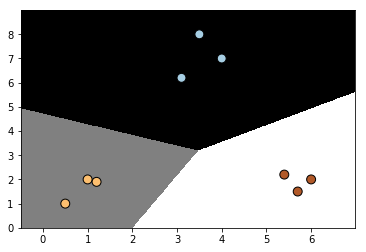

In [58]:
# 实现逻辑回归
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# 输入数据及对应标签
x = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2], [1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

# 初始花一个逻辑回归分类器
classifier = linear_model.LogisticRegression(solver='liblinear',C=100)
# solver用于设置求解系统方程的算法类型
# 参数C表示正则化强度，数值越小，正则化强度越高

# 训练分类器
classifier.fit(x,y)

# 画出数据点和边界
def plot_classifier(classifier,x,y):
    # 定义图形的取值范围
    x_min,x_max = min(x[:,0])-1.0,max(x[:,0])+1.0
    y_min,y_max = min(x[:,1])-1.0,max(x[:,1])+1.0
    # 预测值表示我们在图形中想要使用的数值范围，我们增加了一些余量，例如上述代码中的1.0
    
    # 为了画出边界，还需要利用一组网格数据求出方程的值，然后把边界画出来
    step_size = 0.01 # 网格步长 
    x_values,y_values = np.meshgrid(np.arange(x_min,x_max,step_size),np.arange(y_min,y_max,step_size)) # 定义网格
    
    # 计算出分类器对所有数据点的分类结果
    mesh_output = classifier.predict(np.c_[x_values.ravel(),y_values.ravel()]) # 分类器输出结果
    mesh_output = mesh_output.reshape(x_values.shape) # 数组维度变形
    ## np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等，类似于pandas中的concat()。
    ## np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等，类似于pandas中的merge()。
    ## ravel()将多维数组降位一维
    
    # 用彩色区域画出各个类型的边界
    plt.figure()
    plt.pcolormesh(x_values,y_values,mesh_output,cmap=plt.cm.gray) # 选择配色方案
    
    # 接下来再把训练数据点画在图上
    plt.scatter(x[:,0],x[:,1],c=y,s=80,edgecolors='black',linewidth=1,cmap=plt.cm.Paired)
    # c=y表示颜色使用顺序（y对应的是label），用目标标记映射cmap的颜色表
    plt.xlim(x_values.min(),x_values.max())
    plt.ylim(y_values.min(),y_values.max())
    
    plt.xticks(np.arange(int(x_min),int(x_max),1.0))
    plt.yticks(np.arange(int(y_min),int(y_max),1.0))
    
    plt.show()

plot_classifier(classifier,x,y)

可以通过更改参数C的值观察模型结果的变化     
参数C表示对分类错误的惩罚值，随着C的不断增大，分类错误的惩罚值越高，因此各个类型的边界更优，但也更可能造成过拟合。

## 朴素贝叶斯分类器
朴素贝叶斯分类器是用贝叶斯定理进行建模的监督学习分类器。    

Accuracy of the classifier =  99.5 %


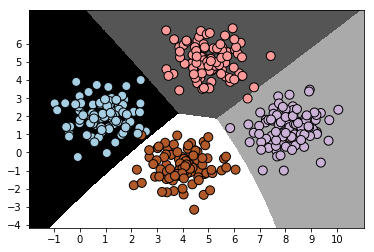

In [60]:
from sklearn.naive_bayes import GaussianNB

def txt_read(filename,delim):
    x_data = []
    y_data = []
    with open(filename,'r') as f:
        for line in f:
            data = [float(x) for x in line.split(delim)]
            x_data.append(data[:-1])
            y_data.append(data[-1])

    x_data = np.array(x_data)
    y_data = np.array(y_data)
    return x_data,y_data 

# 读取数据
x_data,y_data = txt_read('data_multivar.txt',',')

# 建立一个朴素贝叶斯分类器
classifier_guassiannb = GaussianNB() # GaussianNB()指定了正态分布朴素贝叶斯模型 
classifier_guassiannb.fit(x_data,y_data)
y_pred = classifier_guassiannb.predict(x_data)

# 计算分类器准确性
accuracy = 100.0 * (y_data==y_pred).sum()/x_data.shape[0]
print('Accuracy of the classifier = ',round(accuracy,2),'%')

# 画出数据点和边界
plot_classifier(classifier_guassiannb,x_data,y_data)

## 数据集分割
机器学习的一条最佳实践是用没有重叠的数据进行训练和测试。   
理想情况下，需要一些尚未使用的数据进行测试，可以方便准确地评估模型在未知数据上的执行情况

Accuracy of the classifier =  98.0 %


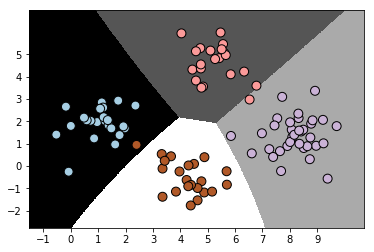

In [69]:
 

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.25,random_state=5)

classifier_guassiannb_new = GaussianNB()
classifier_guassiannb_new.fit(x_train,y_train)

y_test_pred = classifier_guassiannb_new.predict(x_test)

accuracy = 100.0 * (y_test==y_test_pred).sum()/y_test.shape[0]
print('Accuracy of the classifier = ',round(accuracy,2),'%')

plot_classifier(classifier_guassiannb_new,x_test,y_test)

## 交叉检验
为了使模型更稳定，还需要用数据集的不同子集进行反复验证。     
如果只是对特定的子集进行微调，最终可能会过度拟合模型。     
（过度拟合指模型子已知数据集上拟合得超级好，但是一遇到未知数据就挂了）

### 性能指标     
当处理机器学习模型时，通常关心3个指标：精度，召回率，F1得分    
可以用参数评分标准获得各项指标的得分  
- 精度：被分类器正确分类的样本数量占分类器总分类样本数量的百分比
- 召回率：应正确分类的样本数量占分类总样本数量的百分比（有一些样本属于某分类，但分类器却没有分出来）
- F1得分：精度和召回率的合成指标（实际上是精度和召回率的调和均值）

**例子**    
**前提：** 假设数据集有100个样本，其中有82个是我们感兴趣的，现在想用分类器选出这82个样本。      
最终，分类器选出了73个样本，它认为都是我们感兴趣的。但这73个样本中，其实只有65个是我们感兴趣的，剩下8个样本 
我们不感兴趣，是分类器分错了。    

**精度：**    
- 分类正确样本数量 = 65
- 总分类样本数量 = 73
- 精度 = 65/73     

**召回率：**   
- 数据集中我们感兴趣的样本数量 = 82
- 分类正确的样本数量 = 65
- 召回率 = 65/82

**F1得分：**    
一个给力的机器学习模型需要同时具备良好的精度和召回率。这两个指标是二律背反的，一个指标达到100%,另一个就会非常差     
我们需要保持两个指标能够同时处于合理高度，为了量化两个指标的均衡性，引入F1指标   
F1得分 = 2 x 精度 x 召回率 /(精度 + 召回率)

In [74]:
# 下面演示如何进行交叉验证，并提取性能指标
from sklearn.model_selection import cross_val_score

num_validation = 5
accuracy = cross_val_score(classifier_guassiannb,x_data,y_data,scoring='accuracy',cv=num_validation)
print('Accuracy:',round(100*accuracy.mean(),2),'%')

# 用前面的方程分别计算精度，召回率和F1得分
precision = cross_val_score(classifier_guassiannb,x_data,y_data,scoring='precision_weighted',cv=num_validation)
print('Precision:',round(100*precision.mean(),2),'%')

recall = cross_val_score(classifier_guassiannb,x_data,y_data,scoring='recall_weighted',cv=num_validation)
print('Recall:',round(100*recall.mean(),2),'%')

f1 = cross_val_score(classifier_guassiannb,x_data,y_data,scoring='f1_weighted',cv=num_validation)
print('F1:',round(100*f1.mean(),2),'%')


Accuracy: 99.5 %
Precision: 99.52 %
Recall: 99.5 %
F1: 99.5 %


## 混淆矩阵可视化
混淆矩阵是理解分类模型性能的数据表，它有助于我们理解如何把测试数据分成不同的类。     
当想对算法进行调优时，就需要在对算法作出改变之前了解数据的错误分类情况。    
有些分类效果比其他分类效果更差，混淆矩阵可以帮助我们理解这些问题

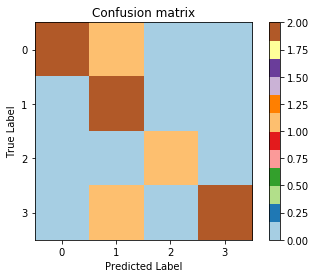

In [77]:
# 首先从数据中提取混淆矩阵
from sklearn.metrics import confusion_matrix
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
confusion_mat = confusion_matrix(y_true,y_pred)

def plot_confusion_matrix(confusion_mat):
    plt.imshow(confusion_mat,interpolation='nearest',cmap=plt.cm.Paired)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(4)
    plt.xticks(tick_marks,tick_marks)
    plt.yticks(tick_marks,tick_marks)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(confusion_mat)

理想情况下，我们希望矩阵非对角线元素都是0，这是最完美的分类结果

In [78]:
# 可以直接用sklearn模块中的函数打印精度、召回率、F1得分
from sklearn.metrics import classification_report
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
target_names = ['Class-0','Class-1','Class-2','Class-3']
print(classification_report(y_true,y_pred,target_names=target_names))

              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.50      1.00      0.67         2
     Class-2       1.00      1.00      1.00         1
     Class-3       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.88      0.83      0.82         9
weighted avg       0.89      0.78      0.79         9

